<a href="https://colab.research.google.com/github/MoazamGreat/Life-of-a-single-dude/blob/main/Copy_of_Moazam_Mustafa_Advanced_Machine_Learning_Assignment_1_Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount Google Drive on Google colab**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load the data set on google colab**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Assignment_1/dataset_for_A1P1 startup_funding-dataset.csv')

        date                       startup             vertical  \
0   9/1/2020                        BYJU’S               E-Tech   
1  1/13/2020                        Shuttl       Transportation   
2   9/1/2020                     Mamaearth           E-commerce   
3   2/1/2020  https://www.wealthbucket.in/              FinTech   
4   2/1/2020                        Fashor  Fashion and Apparel   

                             subvertical       city  \
0                             E-learning  Bengaluru   
1              App based shuttle service    Gurgaon   
2  Retailer of baby and toddler products  Bengaluru   
3                      Online Investment  New Delhi   
4            Embroiled Clothes For Women     Mumbai   

                   investors                 round       amount  
0    Tiger Global Management  Private Equity Round  1650.000000  
1  Susquehanna Growth Equity              Series C    66.399250  
2      Sequoia Capital India              Series B   151.460595  
3 

**Import Suitable Libraries**

In [ ]:
# prompt: I have loaded the data set above. import suitable libraries to perform multivariable regression and feature reduction. Note that some features have text values which must be converted to numerics before performing regression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA




**Explore dataset structure (Check for missing values, data types, and summary statistics**

In [ ]:
# prompt: explore data set's structure (e.g., check for missing values, data types, and
# summary statistics).

# Display the first few rows of the DataFrame
print(df.head())

# Get information about the DataFrame, including data types and non-null values
print(df.info())

# Describe the numerical features of the DataFrame
print(df.describe())

# Check for missing values in each column
print(df.isnull().sum())

# Display the unique values for categorical columns (you might need to adjust column names)
print(df['startup'].unique())
print(df['vertical'].unique())
print(df['subvertical'].unique())
print(df['city'].unique())
print(df['investors'].unique())
print(df['round'].unique())

# Example of checking data type of a specific column
print(df['amount'].dtype)


        date                       startup             vertical  \
0   9/1/2020                        BYJU’S               E-Tech   
1  1/13/2020                        Shuttl       Transportation   
2   9/1/2020                     Mamaearth           E-commerce   
3   2/1/2020  https://www.wealthbucket.in/              FinTech   
4   2/1/2020                        Fashor  Fashion and Apparel   

                             subvertical       city  \
0                             E-learning  Bengaluru   
1              App based shuttle service    Gurgaon   
2  Retailer of baby and toddler products  Bengaluru   
3                      Online Investment  New Delhi   
4            Embroiled Clothes For Women     Mumbai   

                   investors                 round       amount  
0    Tiger Global Management  Private Equity Round  1650.000000  
1  Susquehanna Growth Equity              Series C    66.399250  
2      Sequoia Capital India              Series B   151.460595  
3 

**Handle missing values appropriately**

In [ ]:
# prompt: In the code and its output above. You saw which columns had missing values. Handle missing values appropriately (e.g., imputation or removal).

# ... (Your existing code)

# Handle missing values
# 1. Imputation for numerical features:
# Fill missing 'amount' values with the median
df['amount'].fillna(df['amount'].median(), inplace=True)

# 2. Removal for categorical features (or imputation with mode if appropriate)
# Remove rows with missing 'vertical', 'subvertical', 'city', or 'investors'
df.dropna(subset=['vertical', 'subvertical', 'city', 'investors'], inplace=True)


# ... (Rest of your code)


<ipython-input-15-e3507ad49657>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['amount'].fillna(df['amount'].median(), inplace=True)


**Perform feature scaling (normalization or standardization)**

In [ ]:
# prompt: Perform feature scaling if necessary (e.g., normalization or standardization).  But first you may need to convert all features with text values and date into numerical values for finding correlation with output variable

# Convert text features to numerical using Label Encoding
label_encoders = {}
for column in ['date','startup', 'vertical', 'subvertical', 'city', 'investors', 'round']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store the encoder for later use if needed

# Feature Scaling (Standardization)
scaler = StandardScaler()
numerical_features = ['amount']  # Add other numerical features if needed
df[numerical_features] = scaler.fit_transform(df[numerical_features])


**Display the current changes before moving forward with the assignment**

In [ ]:
# prompt: Show me hat changes you have made in the data set  by printing them to me

# Display the first few rows of the DataFrame *after* changes
print("\nDataFrame head after changes:")
print(df.head())

# Get information about the DataFrame *after* changes
print("\nDataFrame info after changes:")
print(df.info())

# Describe the numerical features of the DataFrame *after* changes
print("\nDataFrame describe after changes:")
print(df.describe())

# Check for missing values in each column *after* changes
print("\nMissing values after handling:")
print(df.isnull().sum())

print("\nData types of columns after changes:")
df.dtypes



DataFrame head after changes:
   date  startup  vertical  subvertical  city  investors  round    amount
0   708      120        29          448     9       1491     20  1.593806
1     9     1309        92           69    25       1445     34 -0.048969
2   708      889        30         1561     9       1309     32  0.039271
3   256     1725        44         1186    54       1612     17 -0.092174
4   256      462        41          493    50       1401     27 -0.102444

DataFrame info after changes:
<class 'pandas.core.frame.DataFrame'>
Index: 2078 entries, 0 to 2077
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2078 non-null   int64  
 1   startup      2078 non-null   int64  
 2   vertical     2078 non-null   int64  
 3   subvertical  2078 non-null   int64  
 4   city         2078 non-null   int64  
 5   investors    2078 non-null   int64  
 6   round        2078 non-null   int64  
 7   amount    

,0
date,int64
startup,int64
vertical,int64
subvertical,int64
city,int64
investors,int64
round,int64
amount,float64


**Identify the outliers and update the data set**

In [ ]:
# prompt: Identify and remove outliers if needed.  update the whole dataset after that

# Identify and remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Apply outlier removal to the 'amount' column
df = remove_outliers_iqr(df, 'amount')

# Display the first few rows of the DataFrame *after* outlier removal
print("\nDataFrame head after outlier removal:")
print(df.head())

# Get information about the DataFrame *after* outlier removal
print("\nDataFrame info after outlier removal:")
print(df.info())

# Describe the numerical features of the DataFrame *after* outlier removal
print("\nDataFrame describe after outlier removal:")
print(df.describe())



DataFrame head after outlier removal:
   date  startup  vertical  subvertical  city  investors  round    amount
1     9     1309        92           69    25       1445     34 -0.048969
3   256     1725        44         1186    54       1612     17 -0.092174
4   256      462        41          493    50       1401     27 -0.102444
5     9     1073        68         1409    18        338     31 -0.040825
7   206      402        90           49    62       1293     31 -0.066500

DataFrame info after outlier removal:
<class 'pandas.core.frame.DataFrame'>
Index: 1747 entries, 1 to 2077
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1747 non-null   int64  
 1   startup      1747 non-null   int64  
 2   vertical     1747 non-null   int64  
 3   subvertical  1747 non-null   int64  
 4   city         1747 non-null   int64  
 5   investors    1747 non-null   int64  
 6   round        1747 non-null   int64  

**Lets look at the whole data set after we have converted all the text values into numerics**

In [ ]:
# prompt: show me the whole dataset now. after all the formatting

df


,date,startup,vertical,subvertical,city,investors,round,amount
1,9,1309,92,69,25,1445,34,-0.048969
3,256,1725,44,1186,54,1612,17,-0.092174
4,256,462,41,493,50,1401,27,-0.102444
5,9,1073,68,1409,18,338,31,-0.040825
7,206,402,90,49,62,1293,31,-0.066500
...,...,...,...,...,...,...,...,...
2073,43,1188,90,919,54,666,19,-0.108435
2074,43,1466,20,587,30,817,26,-0.117849
2075,43,265,90,285,30,1608,26,-0.117849
2076,48,471,20,699,50,121,26,-0.117849


**Build a regression model. Train the model using a portion of the data set (train-test split with an 80-20 ratio)**

In [ ]:
# prompt: Build a multivariable regression model.  I need the model that show me correlation of every feature other than amount with the target variable amountTrain the model using a portion of the dataset (e.g., train-test split with an 80-20 ratio).

import pandas as pd
# Define features (X) and target (y)
X = df.drop('amount', axis=1)
y = df['amount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Get feature importances (coefficients)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_})
print("\nFeature Importances:")
feature_importances


Mean Squared Error: 0.0002350540761407665
R-squared: 0.02535293339298117

Feature Importances:


,Feature,Importance
0,date,3.010326e-07
1,startup,6.874274e-08
2,vertical,2.846169e-05
3,subvertical,6.384485e-07
4,city,-7.202695e-05
5,investors,1.061216e-07
6,round,-1.322459e-03


**Tune hyperparmeters using regularized regression**

In [ ]:
# prompt: Tune hyperparameters if using regularized regression.

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Ridge regression
ridge_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create and train a Ridge regression model with hyperparameter tuning
ridge_model = Ridge()
ridge_grid_search = GridSearchCV(ridge_model, ridge_param_grid, cv=5, scoring='neg_mean_squared_error') # Use 5-fold cross-validation
ridge_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score for Ridge
print("Best hyperparameters for Ridge:", ridge_grid_search.best_params_)
print("Best score for Ridge:", ridge_grid_search.best_score_)

# Make predictions using the best Ridge model
y_pred_ridge = ridge_grid_search.predict(X_test)

# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Mean Squared Error: {mse_ridge}")
print(f"Ridge R-squared: {r2_ridge}")


# Similarly for Lasso and ElasticNet (example for Lasso)
lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_model = Lasso()
lasso_grid_search = GridSearchCV(lasso_model, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

print("Best hyperparameters for Lasso:", lasso_grid_search.best_params_)
print("Best score for Lasso:", lasso_grid_search.best_score_)

y_pred_lasso = lasso_grid_search.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Mean Squared Error: {mse_lasso}")
print(f"Lasso R-squared: {r2_lasso}")


Best hyperparameters for Ridge: {'alpha': 100}
Best score for Ridge: -0.00026192005588784385
Ridge Mean Squared Error: 0.0002348956662033029
Ridge R-squared: 0.026009777058086492
Best hyperparameters for Lasso: {'alpha': 0.001}
Best score for Lasso: -0.0002619513694112731
Lasso Mean Squared Error: 0.0002332498125349155
Lasso R-squared: 0.032834276663860296


**Model Evaluation -Evaluate the model using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score.**

In [ ]:
# prompt: Model Evaluation -Evaluate the model using metrics such as Mean Squared Error (MSE), Mean
# Absolute Error (MAE), and R² score.

from sklearn.metrics import mean_absolute_error

# ... (Your existing code)

# Make predictions on the test set (already done for Linear Regression, Ridge, and Lasso)

# Evaluate the models
# Linear Regression
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - Mean Absolute Error: {mae}")
print(f"Linear Regression - R-squared: {r2}")

# Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression - Mean Absolute Error: {mae_ridge}")
print(f"Ridge Regression - R-squared: {r2_ridge}")

# Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression - Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression - Mean Absolute Error: {mae_lasso}")
print(f"Lasso Regression - R-squared: {r2_lasso}")


Linear Regression - Mean Squared Error: 0.0002350540761407665
Linear Regression - Mean Absolute Error: 0.01079166772758588
Linear Regression - R-squared: 0.02535293339298117
Ridge Regression - Mean Squared Error: 0.0002348956662033029
Ridge Regression - Mean Absolute Error: 0.010793121403079932
Ridge Regression - R-squared: 0.026009777058086492
Lasso Regression - Mean Squared Error: 0.0002332498125349155
Lasso Regression - Mean Absolute Error: 0.010800663592082189
Lasso Regression - R-squared: 0.032834276663860296


**Perform cross-validation to ensure model generalizability.**

In [ ]:
# prompt: Perform cross-validation to ensure model generalizability.

from sklearn.model_selection import cross_val_score

# Perform cross-validation for Linear Regression
linear_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Linear Regression Cross-Validation Scores:", -linear_scores)  # Negative MSE, so negate for positive values
print("Linear Regression Mean CV Score:", -linear_scores.mean())


# Perform cross-validation for Ridge Regression
ridge_scores = cross_val_score(ridge_grid_search.best_estimator_, X, y, cv=5, scoring='neg_mean_squared_error')
print("Ridge Regression Cross-Validation Scores:", -ridge_scores)
print("Ridge Regression Mean CV Score:", -ridge_scores.mean())

# Perform cross-validation for Lasso Regression
lasso_scores = cross_val_score(lasso_grid_search.best_estimator_, X, y, cv=5, scoring='neg_mean_squared_error')
print("Lasso Regression Cross-Validation Scores:", -lasso_scores)
print("Lasso Regression Mean CV Score:", -lasso_scores.mean())


Linear Regression Cross-Validation Scores: [0.00076401 0.0002943  0.00019607 0.0001561  0.00014706]
Linear Regression Mean CV Score: 0.0003115082589192087
Ridge Regression Cross-Validation Scores: [0.00076073 0.00029444 0.00019619 0.00015616 0.00014714]
Ridge Regression Mean CV Score: 0.0003109316575041894
Lasso Regression Cross-Validation Scores: [0.00074484 0.0002963  0.00019767 0.00015685 0.000148  ]
Lasso Regression Mean CV Score: 0.0003087308207788842


**Visualize residuals to anaylze model's performance**

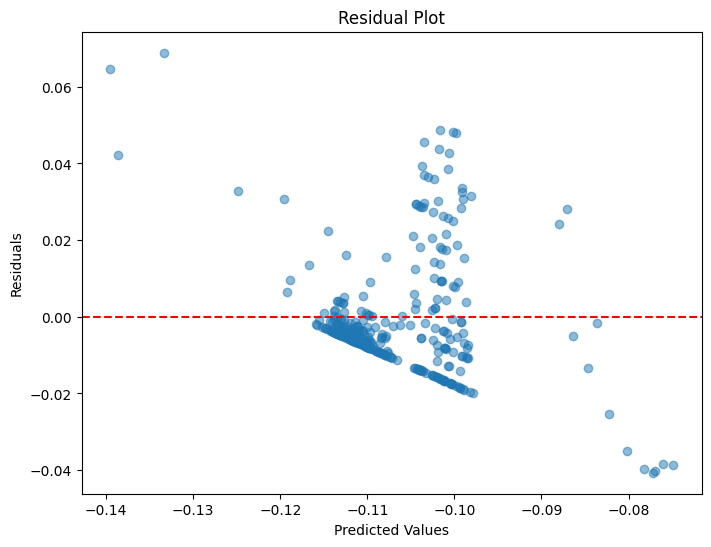

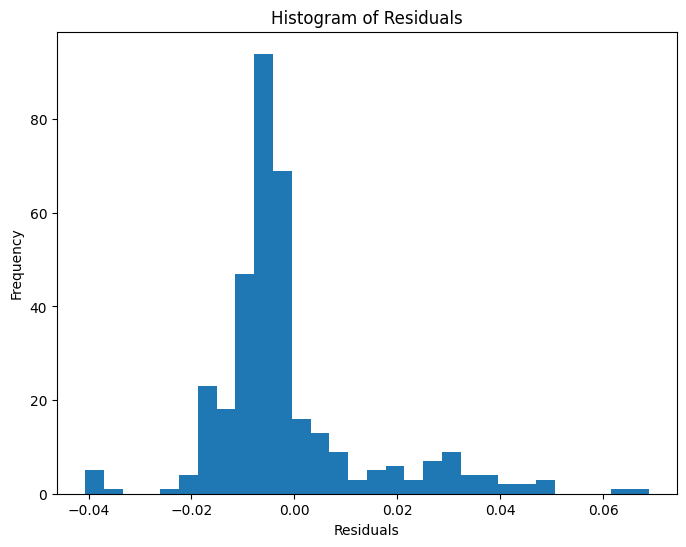

In [ ]:
# prompt: Visualize residuals to analyze the model’s performance.

import matplotlib.pyplot as plt
# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


**Interpretation and Reporting**

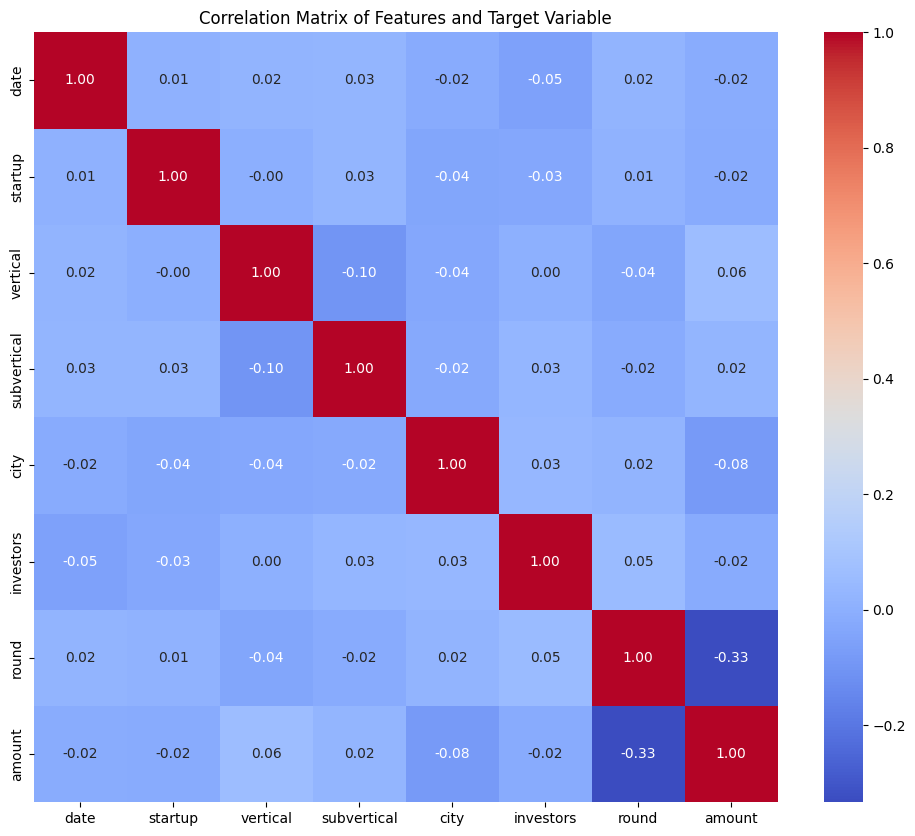

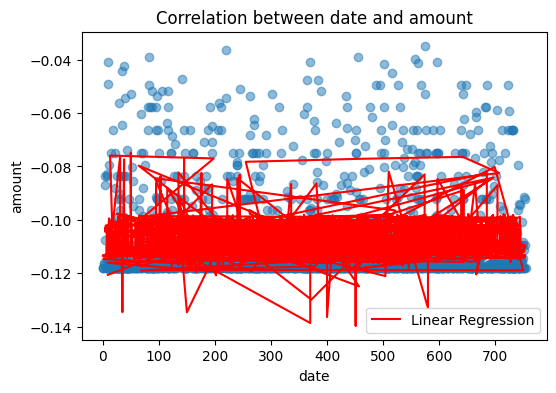

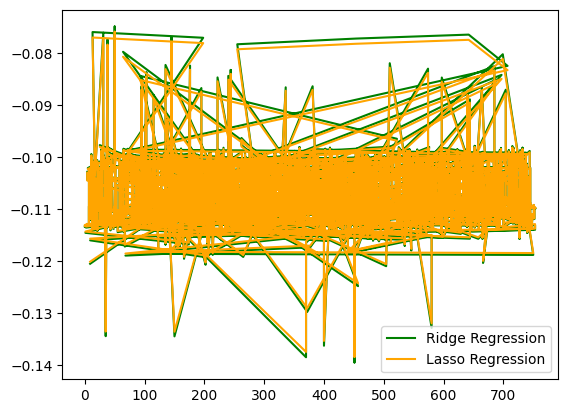

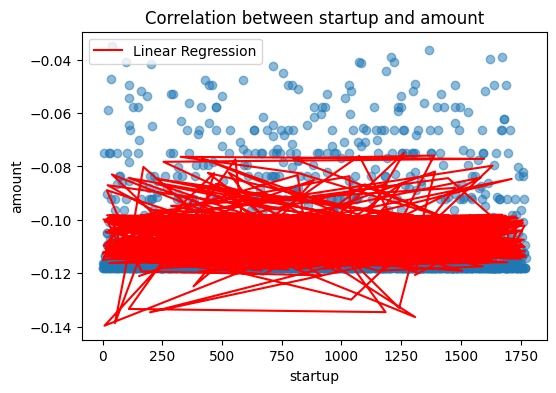

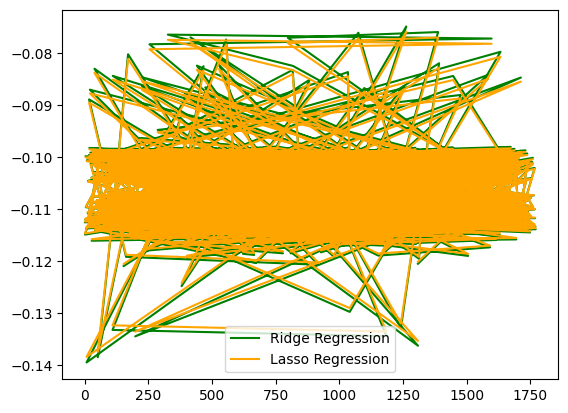

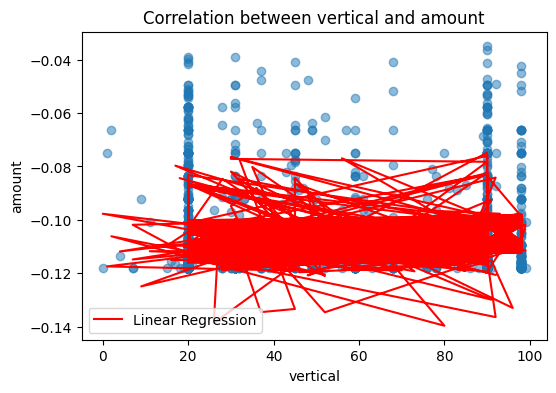

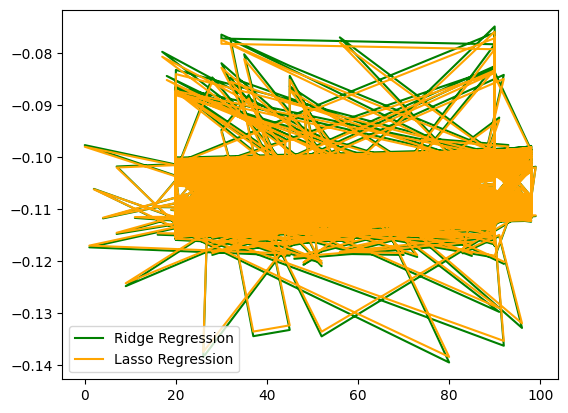

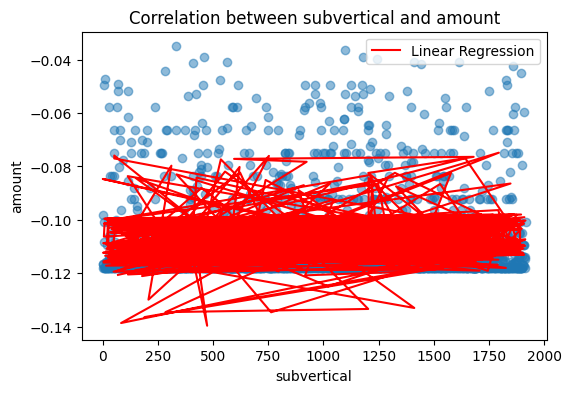

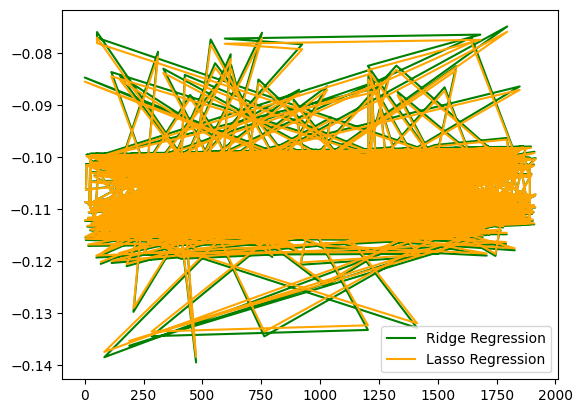

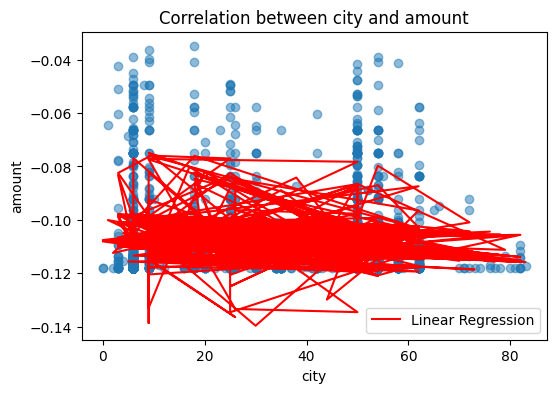

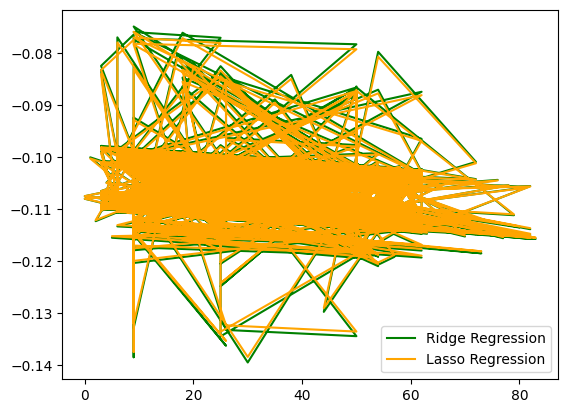

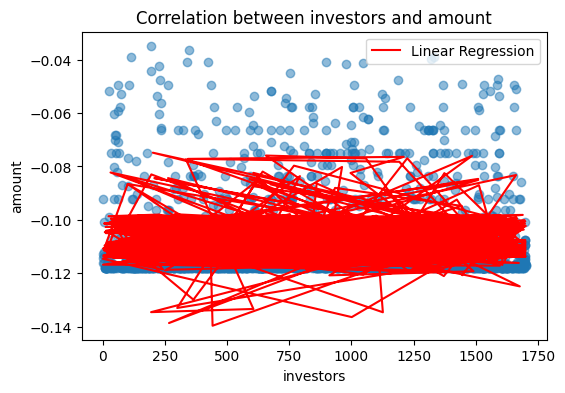

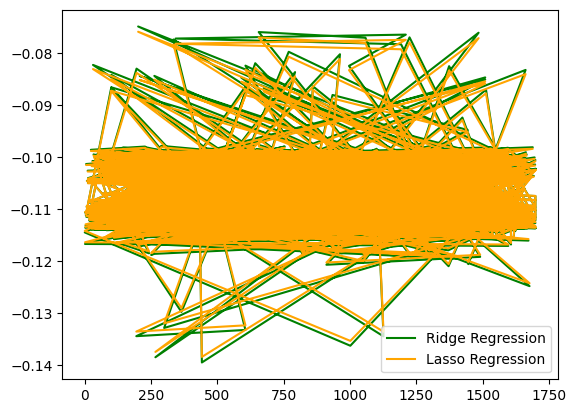

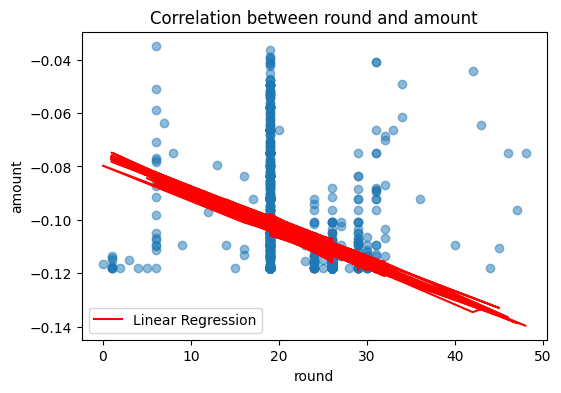

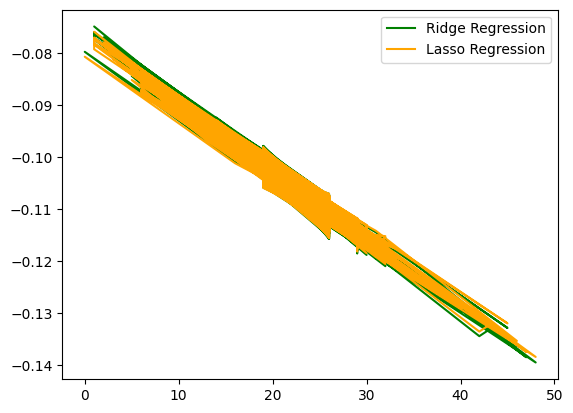

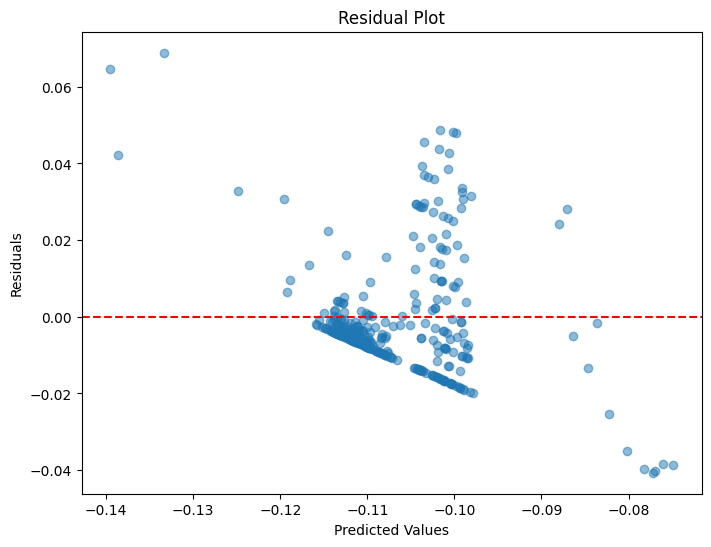

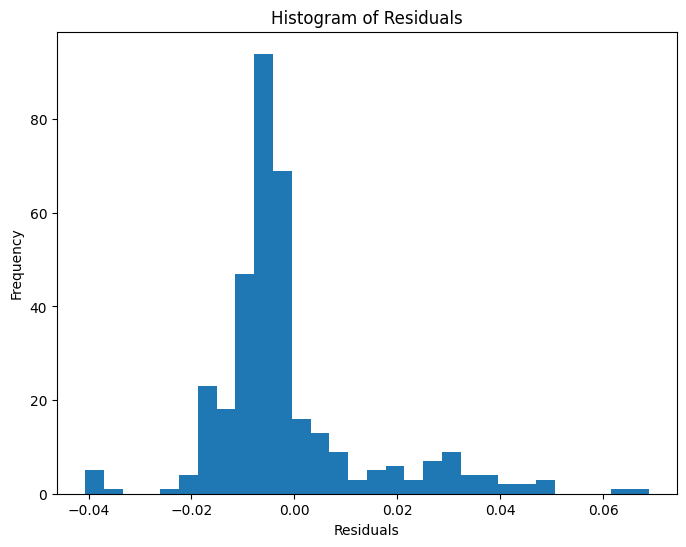

In [ ]:
# prompt: Interpretation and Reporting

import pandas as pd
import matplotlib.pyplot as plt
# Assuming 'X' and 'y' are defined as in your provided code

# Calculate correlations
correlations = pd.concat([X, y], axis=1).corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Target Variable')
plt.show()


# Plot individual feature correlations with the target variable
for col in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(X[col], y, alpha=0.5)
    plt.title(f'Correlation between {col} and amount')
    plt.xlabel(col)
    plt.ylabel('amount')

    # Add the model line for Linear Regression
    plt.plot(X[col], model.predict(X), color='red', label="Linear Regression")  # Plot the model line
    plt.legend() #show the legend

    plt.show()

    # Add model lines for Ridge and Lasso Regression (requires the fitted models)
    plt.plot(X[col], ridge_grid_search.best_estimator_.predict(X), color='green', label="Ridge Regression")
    plt.plot(X[col], lasso_grid_search.best_estimator_.predict(X), color='orange', label="Lasso Regression")
    plt.legend()
    plt.show()


# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()
